In [4]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# new ones
from sklearn import cluster # note the difference
import contextily as cx

In [5]:
# let's use my dataset from CA PBE to vaccines research
fpath = "./unit13data/Ks_all.shp"
db = gpd.read_file(fpath)
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 50 columns):
s_code1314    6951 non-null float64
pb_code131    6951 non-null object
pub_priv      6951 non-null object
pbe0102       6951 non-null float64
pbe0203       6951 non-null float64
pbe0304       6951 non-null float64
pbe0405       6951 non-null float64
pbe0506       6951 non-null float64
pbe0607       6951 non-null float64
pbe0708       6951 non-null float64
pbe0809       6951 non-null float64
pbe0910       6951 non-null float64
pbe1011       6951 non-null float64
pbe1112       6951 non-null float64
pbe1213       6658 non-null object
pbe1314       6951 non-null float64
pbe1415       6951 non-null float64
LatLongSou    6951 non-null object
Charter       5572 non-null object
pub_status    5572 non-null object
religious     1381 non-null object
rel_affil     1381 non-null object
LatSum        6951 non-null float64
LongSum       6951 non-null float64
FRL_pct_01    6951 non-null f

In [6]:
db.crs

{'init': 'epsg:4326'}

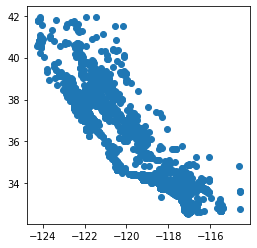

In [7]:
db.plot()

In [8]:
# the enrollment field started as a string (long story), so change back to numeric
db['enroll1314'] = pd.to_numeric(db['enroll1314'])

In [9]:
# verify
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 50 columns):
s_code1314    6951 non-null float64
pb_code131    6951 non-null object
pub_priv      6951 non-null object
pbe0102       6951 non-null float64
pbe0203       6951 non-null float64
pbe0304       6951 non-null float64
pbe0405       6951 non-null float64
pbe0506       6951 non-null float64
pbe0607       6951 non-null float64
pbe0708       6951 non-null float64
pbe0809       6951 non-null float64
pbe0910       6951 non-null float64
pbe1011       6951 non-null float64
pbe1112       6951 non-null float64
pbe1213       6658 non-null object
pbe1314       6951 non-null float64
pbe1415       6951 non-null float64
LatLongSou    6951 non-null object
Charter       5572 non-null object
pub_status    5572 non-null object
religious     1381 non-null object
rel_affil     1381 non-null object
LatSum        6951 non-null float64
LongSum       6951 non-null float64
FRL_pct_01    6951 non-null f

In [10]:
# let's choose some variables related to PBEs
k_props = ['FRL_pct131','pbe1314', 'pctWht1314', 'enroll1314',
           'pctAA1314', 'pme1314']

/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


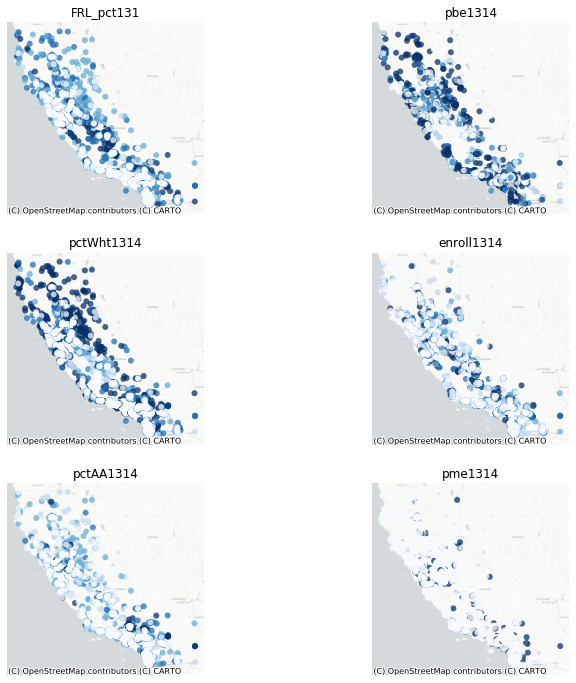

In [11]:
# Create figure and axes (this time it's 6, arranged 3 by 2)
f, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(k_props):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db.plot(column=col, ax=ax, scheme='Quantiles', \
             linewidth=0, cmap='Blues', alpha=0.75)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
    # Add basemap
    cx.add_basemap(ax,
                   crs = db.crs,
                   source=cx.providers.CartoDB.Positron
    )
# Display the figure

plt.show()

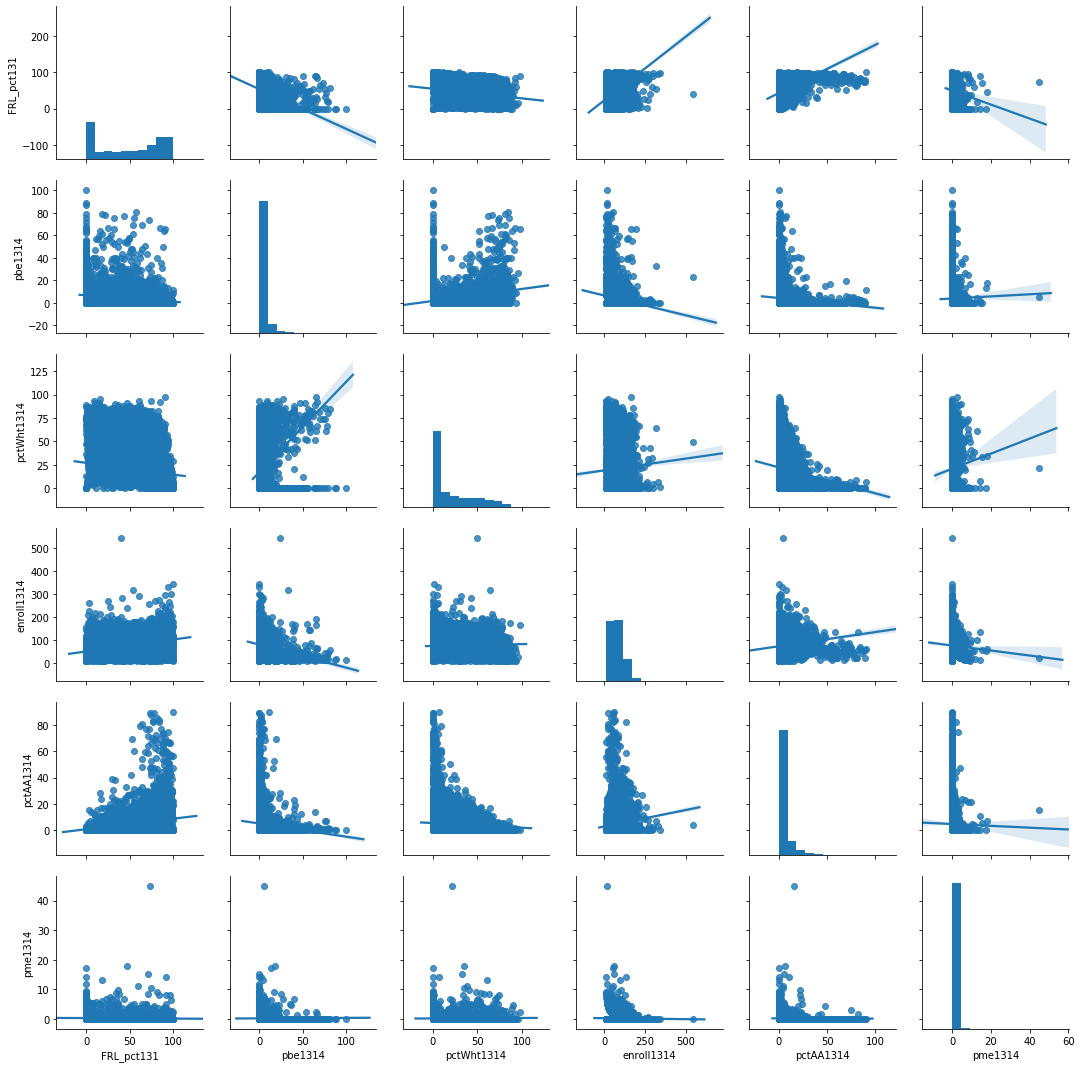

In [12]:
# how do the variables compare???
sns.pairplot(db[k_props], kind='reg', diag_kind='hist')

In [13]:
# setup the kmeans. We'll use k = 5. at this point, we don't even have to pass it the data
# This sets up an object that holds all the parameters required to run the algorithm

kmeans5 = cluster.KMeans(n_clusters=5, random_state=8675309)

In [14]:
# Run the clustering algorithm on the variables we selected
k5cls = kmeans5.fit(db[k_props])

In [15]:
k5cls
# it's an object

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8675309, tol=0.0001, verbose=0)

In [16]:
# look at the labels
k5cls.labels_

array([4, 1, 2, ..., 4, 3, 0], dtype=int32)

In [17]:
# add the cluster labels back to the dataset

db['k5cls'] = k5cls.labels_

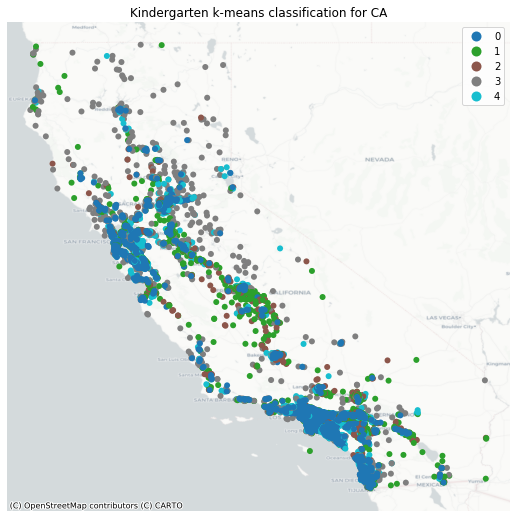

In [18]:
## PLOT THE FIGURE WITH LABELS

# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
db.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Add title
plt.title('Kindergarten k-means classification for CA')
cx.add_basemap(ax,
               crs = db.crs,
               source=cx.providers.CartoDB.Positron
)
# Display the map
plt.show()

In [19]:
# Let's look more deeply at the clusters

k5sizes = db.groupby('k5cls').size()
k5sizes

k5cls
0    1402
1    2157
2    1182
3    1044
4    1166
dtype: int64

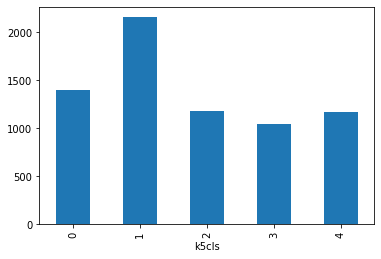

In [20]:
k5sizes.plot.bar()
# cluster 1 is a bit larger than others

In [21]:
# let's look at the means

# Calculate the mean by group
k5means = db.groupby('k5cls')[k_props].mean()
# Transpose it
k5means.T

k5cls,0,1,2,3,4
FRL_pct131,0.529229,80.572034,83.019681,38.189793,26.163818
pbe1314,5.564044,1.365202,1.120981,9.631542,4.673816
pctWht1314,0.439036,10.793861,8.680816,58.274154,44.134858
enroll1314,28.022825,71.316643,137.220812,47.076628,106.854202
pctAA1314,0.082667,8.154579,6.591430,2.680554,3.474692
pme1314,0.269387,0.133505,0.153173,0.248630,0.255437


In [22]:
##### QUESTIONS #####

# 1. How would you characterize the different clusters?

# 2. How might the "story" (i.e., the analysis) change...
# if you were to use a different subset of variables? 
# if you were to use a different k?  

######## TRY IT! ########